#  N-Dimensional Clusters

Now that we have understood K-means for vectors, let's consider the same method for N-dimensional clusters.

The principle is the same as for vectors, but unlike the vector use case, selection of the $distance function$ is very important.  A list of distance functions that the KMeans functionality supports is here:  http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.distance.cdist.html.  You can also define your own distance functions.

We start with $K$ random seeds (centers) and measure the $distance$ to each of the points, after which we move the center into the mean of such distances and reevaluate the distances.

Here is a demo of k-means clustering algorithm:  http://shabal.in/visuals/kmeans/1.html

And here are examples of implementation in Python: https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

With K-means, a lot depends on where clustering starts.  Solutions:

    cross-validation by mini-batching
    choosing multiple random cluster starting points
    kmeans++
    ...    

How kmeans++ works is here:  https://www.youtube.com/watch?v=BIQDlmZDuf8 (**run it at 0.5 the normal speed** - unless you can read $VERY$ fast)

We now proceed to using K-means to split $iris$ data into multi-dimensional clusters

In [14]:
# The standard start of our notebooks
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import re

Load the data set. Clustering belongs to unsupervised learning; so we are not going to need the labels ($iris.target$ is irrelevant; working only with $iris.data$), and we are not breaking the data into training and test sets.

In [40]:
# Load the data, which is included in sklearn.
iris = load_iris()
print 'Iris feature names:', iris.feature_names
X, Names = iris.data, iris.feature_names

##  Remove the " (cm)" part
pattern = r' \(cm\)'
for nn in np.arange(0,len(Names)):
    Names[nn] = re.sub (pattern, lambda x: "", Names[nn])
print Names

print X.shape

# Shuffle the data, but make sure that the features and accompanying lalen(bels stay in sync.
np.random.seed(0)  #  To ensure repeatability of results
shuffle = np.random.permutation(np.arange(X.shape[0]))
X = X[shuffle]

Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['sepal length', 'sepal width', 'petal length', 'petal width']
(150, 4)


Let's explore each feature, to see if any grouping exists naturally in each of them.  We'll plot histograms, because boxplots are not sensitive to such groupings.

Back to our data.  If we look at finding the optimal number of clusters as a likelihood-maximization probem, we can use **Information Criteria (*BIC* and *AIC*)** to estimate when we can stop increasing the number: if we are not adding new information by adding one more cluster, we are done.

In [ ]:
##########################################################################################################################

Now let's look at some 2D combinations of features, just to help us visualize the data:

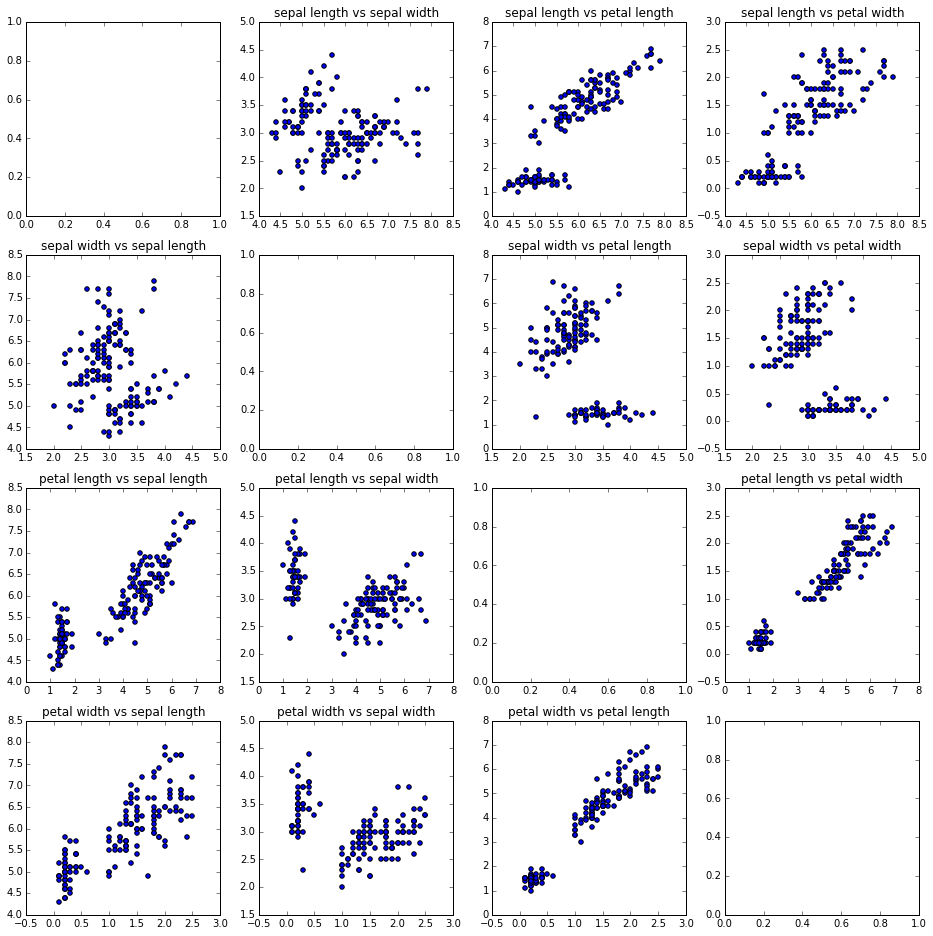

In [41]:
fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex=False, sharey=False, figsize = (16, 16))


for f1 in np.arange (X.shape[1]):
    for f2 in np.arange (X.shape[1]):
       if not f1 == f2:
            ax = axes[f1, f2]
            ax.scatter (X[:,f1], X[:,f2])
            ax.set_title (Names[f1] + " vs " + Names[f2])
            
plt.show()

We see that the data naturally fall into 2 clusters for each pair of features.

Let's take one pair (sepal length, sepal width) and see how KMeans works with these two

(1, 2)
[[ 5.84333333  3.054     ]]
['r']


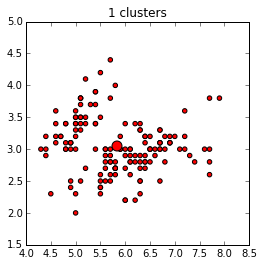

(2, 2)
[[ 6.61044776  2.96567164]
 [ 5.22409639  3.1253012 ]]
['r' 'g']


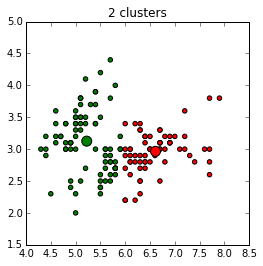

(3, 2)
[[ 6.81276596  3.07446809]
 [ 5.006       3.418     ]
 [ 5.77358491  2.69245283]]
['r' 'g' 'b']


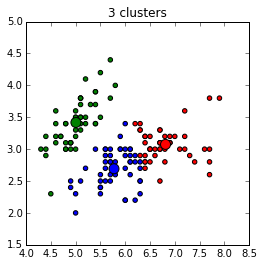

(4, 2)
[[ 5.90980392  2.73529412]
 [ 5.22413793  3.65517241]
 [ 6.85348837  3.1       ]
 [ 4.77407407  2.93703704]]
['r' 'g' 'b' 'm']


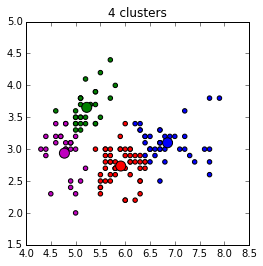

(5, 2)
[[ 5.25555556  3.67037037]
 [ 5.83953488  2.70930233]
 [ 6.53421053  3.04210526]
 [ 7.43846154  3.13076923]
 [ 4.77586207  2.97241379]]
['r' 'g' 'b' 'm' 'c']


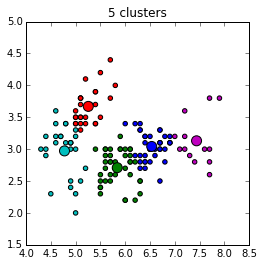

(6, 2)
[[ 4.828125    3.25      ]
 [ 6.56571429  3.04571429]
 [ 5.20769231  2.41538462]
 [ 7.43846154  3.13076923]
 [ 5.37058824  3.8       ]
 [ 5.9125      2.77      ]]
['r' 'g' 'b' 'm' 'c' 'k']


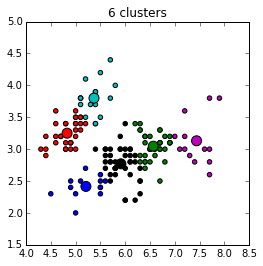

(7, 2)
[[ 6.6         3.13793103]
 [ 4.828125    3.25      ]
 [ 5.67407407  2.74444444]
 [ 7.475       3.125     ]
 [ 6.22307692  2.7       ]
 [ 5.37058824  3.8       ]
 [ 4.94285714  2.38571429]]
['r' 'g' 'b' 'm' 'c' 'k' '0']


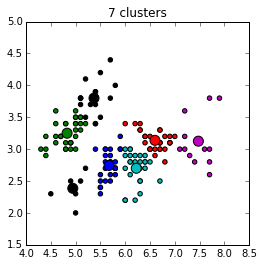

In [90]:
Xpair = X[:,(0,1)]

def Get2DClusters (Xpair, N):
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (Xpair)
    print clstrs.cluster_centers_.shape
    print clstrs.cluster_centers_

    myColors = ('red', 'green', 'blue', 'magenta', 'cyan', 'k', '0.2', '0.4')
    if N > 8:
        return clstrs
    
    myClCols = np.empty(Xpair.shape[0], 'string')
    for ii in np.arange (0, len(clstrs.labels_)):
        color_index = clstrs.labels_[ii]
        myClCols[ii] = myColors[color_index]

    plt.figure(figsize = (4, 4))
    plt.scatter (Xpair[:,0], Xpair[:,1], c = myClCols)

    myCntrCol = np.empty(N, 'string')
    for ii in np.arange (0, N):
        color_index = ii
        myCntrCol[ii] = myColors[color_index]

    print myCntrCol
    plt.scatter (clstrs.cluster_centers_[:,0], clstrs.cluster_centers_[:,1], c = myCntrCol, s = 100)
    plt.title (str(N) + " clusters")
    plt.show()
    return clstrs

for nn in range (1, 8):
    myClstrs = Get2DClusters(Xpair, N = nn)


We have demonstrated the use of KMeans in clustering multi-dimensional data.  The same principles will apply to any number of dimensions.  Note that the complexity of K-means algorithm is $O(K * n)$ ($n$ is number of observations in the data set)

The Euclidean distance - which is what KMeans is designed for - ensures that clustering works the way it does.  KMeans is the simplest clustering method, yet very often it is sufficient.  Like with vector clustering, care must be taken to ensure that we are not overfitting (not splitting the data into more clusters than we really need.

Note that the obvious "DMZ" band between the data points is practically ignored by KMeans at low cluster counts, placing the green centroid at N = 2 right into it.  It is something to be aware of.  SVM would have been more useful in this case.